[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [1]:
!MINIMAL=1 pip install kats

In [2]:
pip install "numpy==1.20"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

In [4]:
import pandas as pd

owid_covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
owid_covid["date"] = pd.to_datetime(owid_covid["date"])
df = owid_covid[owid_covid.location == "France"].set_index("date", drop=True).resample('D').interpolate(method='linear').reset_index()

In [58]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    linear_model,
    quadratic_model
)


model_params = EnsembleParams(
            [
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
            ]
        )

# create `KatsEnsembleParam` with detailed configurations 
KatsEnsembleParam = {
    "models": model_params,
    "aggregation": "weightedavg",
    "seasonality_length": 30,
    "decomposition_method": "additive",
}

In [59]:
from kats.consts import TimeSeriesData
TARGET_COL = "new_cases"

df_ts = TimeSeriesData(
    value=df[TARGET_COL], time=df["date"]
)

In [60]:
m = KatsEnsemble(
    data=df_ts, 
    params=KatsEnsembleParam
).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



In [66]:
m.predict(steps=90).aggregate()

,time,fcst,fcst_lower,fcst_upper
0,2021-08-30,22285.561453,-1171.170383,45742.293289
1,2021-08-31,16444.612560,-7013.454502,39902.679623
2,2021-09-01,5369.218826,-18090.197391,28828.635042
3,2021-09-02,23246.716252,-214.063139,46707.495642
4,2021-09-03,26489.272699,3027.116022,49951.429376
...,...,...,...,...
85,2021-11-23,25439.940452,1810.393433,49069.487471
86,2021-11-24,21663.852593,-1968.565321,45296.270507
87,2021-11-25,9265.719647,-14369.591679,32901.030973
88,2021-11-26,30836.910168,7198.682808,54475.137529


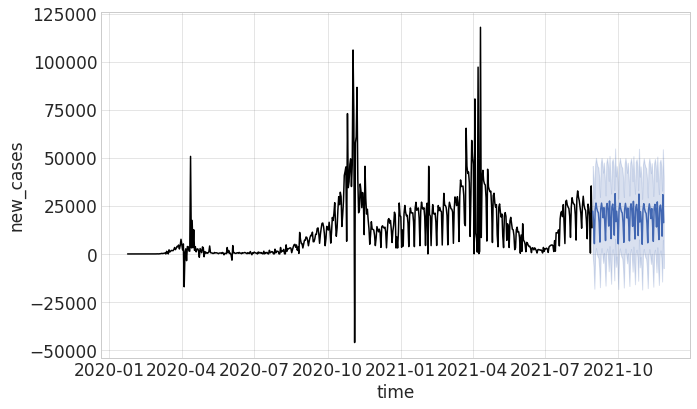

In [64]:
m.predict(steps=90)
m.aggregate()
m.plot()
plt.ylabel(TARGET_COL)